📌 Business Scenario
A smart city power department wants to predict tomorrow’s electricity demand (in MW) using the last 7 days of hourly consumption data.
This helps to:
Avoid power shortages ⚡
Optimize power generation scheduling
Reduce operational costs
🔹 Sample Dataset (Simplified – Daily Average)
 
Day	Electricity Demand (MW)
1	320
2	340
3	360
4	355
5	370
6	390
7	410
8	Target (to predict)
 
 
Use LSTM and GRU model for forcasting
 

In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense


tf.random.set_seed(42)
np.random.seed(42)


series = np.array([320, 340, 360, 355, 370, 390, 410], dtype=np.float32)

window_size = 7  
assert len(series) == window_size, "We only have the 7 days that form a single training window."


X = series.reshape(1, window_size, 1)  # shape: (batch=1, time=7, features=1)

last_diff = float(series[-1] - series[-2])  # 410 - 390 = 20
y_value = float(series[-1] + last_diff)     
y = np.array([[y_value]], dtype=np.float32)  


x_mean = X.mean()
x_std  = X.std() + 1e-8
Xn = (X - x_mean) / x_std


def build_lstm():
    model = Sequential([
        LSTM(32, input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2, clipnorm=1.0),
                  loss='mse')
    return model

def build_gru():
    model = Sequential([
        GRU(32, input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2, clipnorm=1.0),
                  loss='mse')
    return model

lstm_model = build_lstm()
gru_model  = build_gru()

lstm_model.summary()
gru_model.summary()


epochs = 300
history_lstm = lstm_model.fit(Xn, y, epochs=epochs, batch_size=1, verbose=0)
history_gru  = gru_model.fit( Xn, y, epochs=epochs, batch_size=1, verbose=0)

print("LSTM final train loss:", float(history_lstm.history['loss'][-1]))
print("GRU  final train loss:", float(history_gru.history['loss'][-1]))


pred_lstm = float(lstm_model.predict(Xn, verbose=0)[0, 0])
pred_gru  = float(gru_model.predict( Xn, verbose=0)[0, 0])

naive_repeat_last = float(series[-1])          
naive_add_last_diff = float(series[-1] + last_diff)  


c:\Users\Pratik.Jadhav\Downloads\Training\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

LSTM final train loss: 105776.7421875
GRU  final train loss: 106249.140625


In [2]:


print(f"Input (Day 1..7): {series.tolist()}")
print(f"Target used for training (illustrative): {y_value:.2f}")
print(f"Baseline (repeat last): {naive_repeat_last:.2f}")
print(f"Baseline (add last diff): {naive_add_last_diff:.2f}")
print(f"Predicted Day 8 (LSTM): {pred_lstm:.2f}")
print(f"Predicted Day 8 (GRU) : {pred_gru:.2f}")



Input (Day 1..7): [320.0, 340.0, 360.0, 355.0, 370.0, 390.0, 410.0]
Target used for training (illustrative): 430.00
Baseline (repeat last): 410.00
Baseline (add last diff): 430.00
Predicted Day 8 (LSTM): 105.10
Predicted Day 8 (GRU) : 104.37


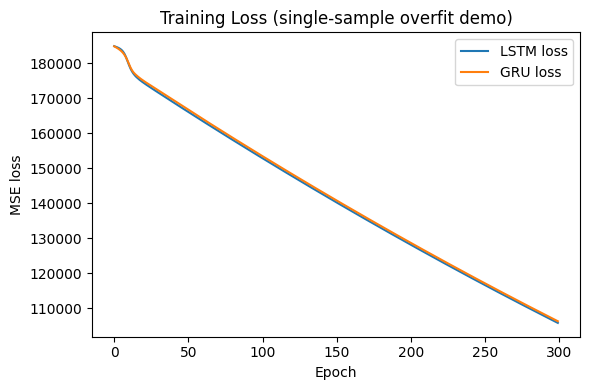

In [3]:

plt.figure(figsize=(6,4))
plt.plot(history_lstm.history['loss'], label='LSTM loss')
plt.plot(history_gru.history['loss'],  label='GRU loss')
plt.title('Training Loss (single-sample overfit demo)')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.tight_layout()
plt.show()
